## Table of Contents
* [Part 1: Loading the Dataset](#Part-1:-Loading-the-Dataset)
* [Part 2.1: Preparing the Data](#Part-2.1:-Preparing-the-Data)
    * [2.1.1. Separating the Region Data from the Area data](#2.1.1.-Separating-the-Region-Data-from-the-Area-data)
    * [2.1.2. Adding Region Names to the Area dataset](#2.1.2.-Adding-Region-Names-to-the-Area-dataset)
    * [2.1.3. Dealing with Missing Values in the Dataframes](#2.1.3.-Dealing-with-Missing-Values-in-the-Dataframes)
* [Part 2.2: Trends](#Part-2.2:-Trends)
    * [2.2.1. Plotting and Visualising Trends of Prices for Flats and Detached Properties](#2.2.1.-Plotting-and-Visualising-Trends-of-Prices-for-Flats-and-Detached-Properties)
    * [2.2.2. Comments on Trends from the Figure](#2.2.2.-Comments-on-Trends-from-the-Figure)
* [Part 2.3: Price Changes](#Part-2.3:-Price-Changes)
    * [2.3.1. Price Changes in Flats between July 2017 to July 2018](#2.3.1.-Price-Changes-in-Flats-between-July-2017-to-July-2018)
    * [2.3.2. Visualisation of Price Changes between July 2017 to July 2018](#2.3.2.-Visualisation-of-Price-Changes-between-July-2017-to-July-2018)
    * [2.3.3. Comment on the Visualisation of Price Changes of Flats between July 2017 to July 2018](#2.3.3.-Comment-on-the-Visualisation-of-Price-Changes-of-Flats-between-July-2017-to-July-2018)
* [Part 2.4: Statistical Analysis](#Part-2.4:-Statistical-Analysis)
    * [2.4.1. Cross Tabulation of Price Changes from 2.3](#2.4.1.-Cross-Tabulation-of-Price-Changes-from-2.3)
    * [2.4.2. Chi-Squared Test of Independence](#2.4.2.-Chi-Squared-Test-of-Independence)
    * [2.4.3. Interpreting the Chi-Squared Test](#2.4.3.-Interpreting-the-Chi-Squared-Test)

# Coursework 3: Trends and Analysis of Property Prices in England

This coursework focuses on two datasets that show property prices in England and their area/region. Trends between areas are analysed and reported on.

## Part 1: Loading the Dataset

The necessary libraries and dataset are loaded, ready to analyse. They are listed below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
property_price = pd.read_csv("average-property-price.csv")
property_price = property_price.assign(Month = pd.to_datetime(property_price['Date'], dayfirst=True)).drop(labels='Date', axis=1)
loc_code = pd.read_csv("location-codes.csv")

In [3]:
property_price

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [4]:
loc_code

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


## Part 2.1: Preparing the Data
### 2.1.1. Separating the Region Data from the Area data

Each area of the UK can be assorted into 9 regions, which can be identified through the 'RegionCode' in the loc_code dataframe. The property_price contains a mix of both Area and Region properties, and therefore this section focuses on isolating the Regions (with 'E12' RegionCode prefixes) from the other Areas in the property_price dataframe. The two dataframes are called region_data and area_data.


In [5]:
region_code = [loc_code.RegionCode]
region_data = property_price.loc[property_price['Code'].isin(region_code[0])]
region_data

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [6]:
area_data = property_price.drop(index = region_data.index)
area_data

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### 2.1.2. Adding Region Names to the Area dataset

The Area dataset doesn't contain the region to which each property belongs to. This section utilises the location dataset to add the Region Names to each data point in the area_data dataframe.

In [7]:
loc_code_2 = pd.DataFrame().assign(Code= loc_code['AuthorityCode'], Region= loc_code['RegionName'])
area_data = pd.merge(area_data, loc_code_2)
area_data

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


### 2.1.3. Dealing with Missing Values in the Dataframes

There are missing values in the area_data as displayed below. All these missing values happen to be from the Area of "City of London" for Detaches, Semi, and half of Terraced properties. For the purpose of this coursework, these missing values are ignored as they are not needed in future analysis.

In [8]:
missing_region = region_data[region_data.isnull().any(axis= 1)]
missing_region

,Area,Code,Detached,Semi,Terraced,Flat,Month


In [9]:
missing_area = area_data[area_data.isnull().any(axis=1)]
missing_area

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


## Part 2.2: Trends
### 2.2.1. Plotting and Visualising Trends of Prices for Flats and Detached Properties

This section looks at the trends of prices  between Flats and Detached Properties using the region_data. The section aims to visualise any trends between Flats and Detached Properties in relation to the 9 regions of England over the course of 36 months.

In [10]:
def makeTime(row):
    return pd.Timestamp(row.Month)

region_data2 = region_data.assign(Date = region_data.apply(makeTime, axis=1))
region_data2 = region_data2.drop("Month", axis = 1)
region_data2 = region_data2.set_index(keys='Date')
region_data2

,Area,Code,Detached,Semi,Terraced,Flat
Date,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
2019-05-01,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
2019-06-01,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830


In [13]:
flat_region = pd.pivot_table(region_data2.reset_index(), index='Date', columns='Area', values='Flat')
detached_region = pd.pivot_table(region_data2.reset_index(), index='Date', columns='Area', values='Detached')
detached_region

Area,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands Region,Yorkshire and The Humber
Date,,,,,,,,,
2016-09-01,253192.5738,405841.8655,883706.1247,208117.1739,258657.9184,527197.4444,366226.9314,293131.3321,241975.9618
2016-10-01,253113.5644,406573.8362,883336.1414,208519.1158,257093.7678,528135.7832,362947.1527,291204.5534,242695.6641
2016-11-01,256399.0387,408206.6914,886552.8418,210555.4948,259290.4851,531277.2444,368767.4806,295637.5125,245728.3337
2016-12-01,256072.6841,411744.8900,887004.7033,211728.7243,258008.8847,530752.5402,365481.7859,294605.1742,246480.2363
2017-01-01,254846.8515,410560.0190,893279.1773,205942.7099,258860.3637,537855.6757,369559.0554,294141.4508,241975.4125
2017-02-01,256861.6541,411944.6695,887958.7840,209000.7787,260254.7932,529118.8580,368844.6919,294116.9249,242962.8627
2017-03-01,257481.8619,411211.1664,893858.7342,206299.9682,259462.3536,533570.9350,368883.8500,295564.0449,242610.4487
2017-04-01,261248.1976,416558.8181,899132.7916,209870.7827,263377.9298,538673.2864,370826.5935,297490.4605,248126.6759
2017-05-01,260872.7607,417077.1037,890430.0883,211397.5399,262220.8090,534449.8795,370853.6026,297428.8104,247651.9871


Text(0.5, 0.98, 'Trends across Different Regions for Detached and Flat Properties in England between September 2016 and August 2019')

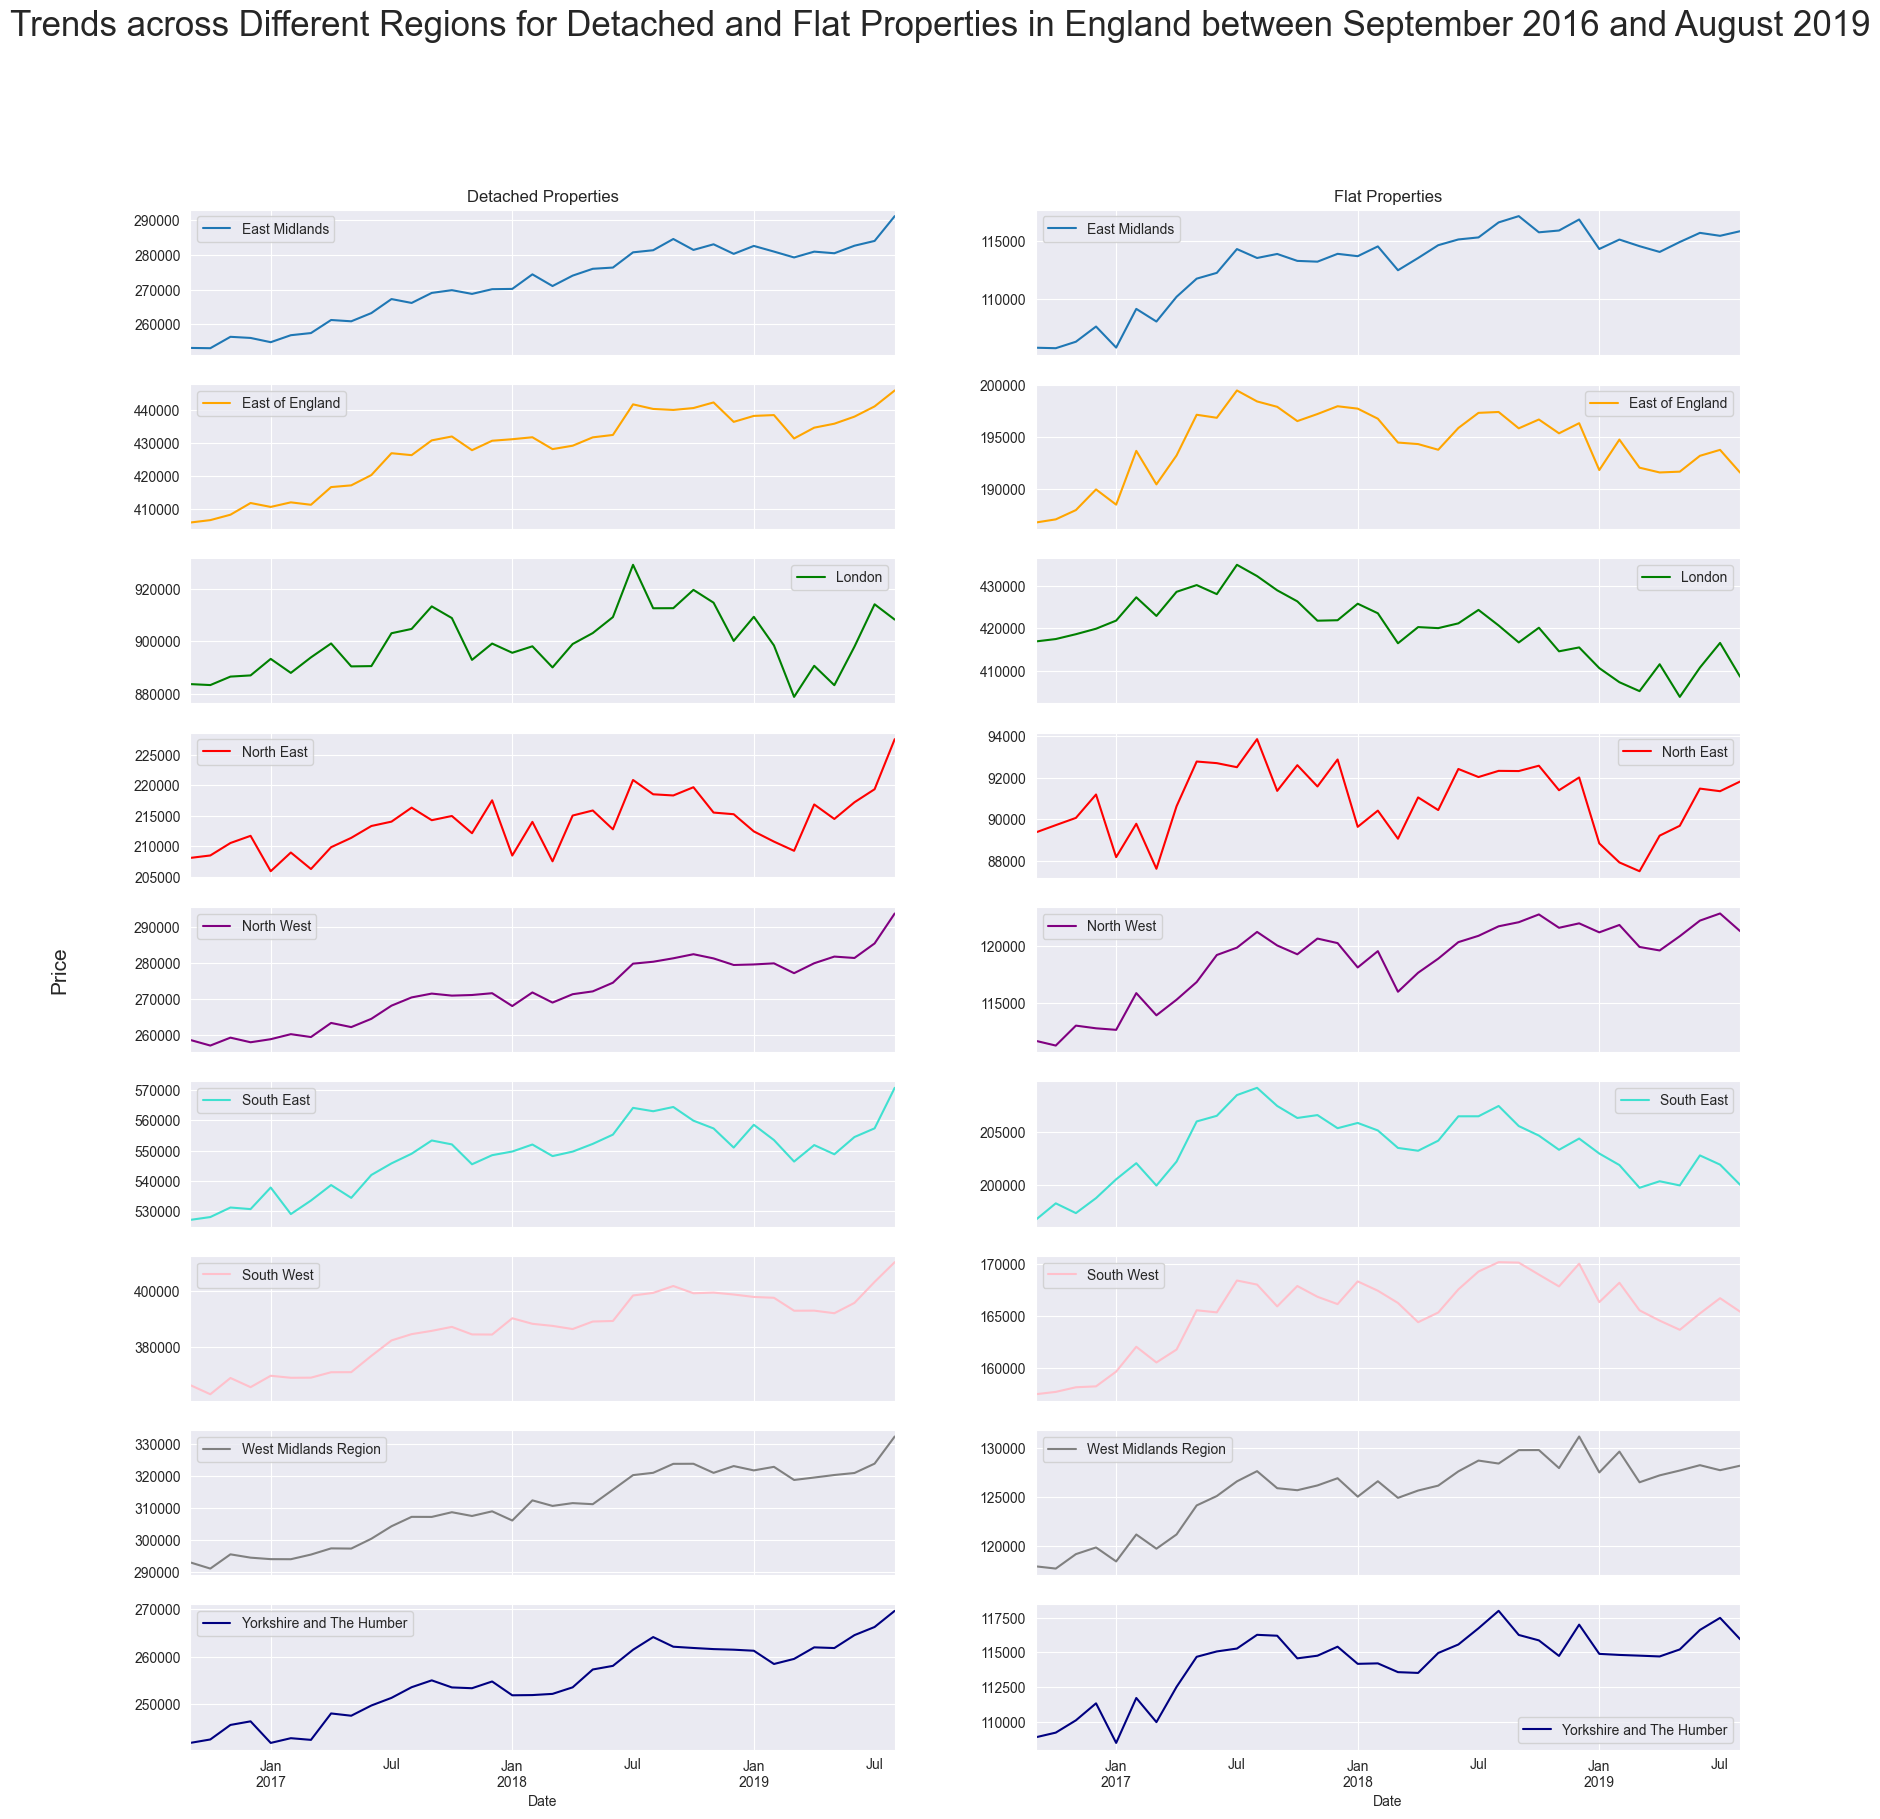

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=9, figsize= (20, 20), sharex= True)
detached_region["East Midlands"].plot(ax = axs[0,0])
axs[0,0].legend(loc= 'upper left')
axs[0,0].set_title("Detached Properties")
flat_region["East Midlands"].plot(ax = axs[0,1])
axs[0,1].legend()
axs[0,1].set_title("Flat Properties")
detached_region["East of England"].plot(ax= axs[1,0], color = 'orange')
axs[1,0].legend()
flat_region["East of England"].plot(ax = axs[1,1], color = 'orange')
axs[1,1].legend()
detached_region["London"].plot(ax= axs[2,0], color= 'green')
axs[2,0].legend()
flat_region["London"].plot(ax= axs[2,1], color= 'green')
axs[2,1].legend()
detached_region["North East"].plot(ax= axs[3,0], color= 'red')
axs[3,0].legend()
flat_region["North East"].plot(ax= axs[3,1], color= 'red')
axs[3,1].legend()
detached_region["North West"].plot(ax= axs[4,0], color= 'purple')
axs[4,0].legend()
flat_region["North West"].plot(ax= axs[4,1], color= 'purple')
axs[4,1].legend()
detached_region["South East"].plot(ax= axs[5,0], color= 'turquoise')
axs[5,0].legend()
flat_region["South East"].plot(ax= axs[5,1], color= 'turquoise')
axs[5,1].legend()
detached_region["South West"].plot(ax= axs[6,0], color= 'pink')
axs[6,0].legend()
flat_region["South West"].plot(ax= axs[6,1], color= 'pink')
axs[6,1].legend()
detached_region["West Midlands Region"].plot(ax= axs[7,0], color= 'grey')
axs[7,0].legend()
flat_region["West Midlands Region"].plot(ax= axs[7,1], color= 'grey')
axs[7,1].legend()
detached_region["Yorkshire and The Humber"].plot(ax= axs[8,0], color= 'navy')
axs[8,0].legend()
flat_region["Yorkshire and The Humber"].plot(ax= axs[8,1], color= 'navy')
axs[8,1].legend()

fig.text(0.06, 0.5, 'Price', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.suptitle("Trends across Different Regions for Detached and Flat Properties in England between September 2016 and August 2019",fontsize = 25)

### 2.2.2. Comments on Trends from the Figure
On average, it is evident that Detached properties are worth more than Flats as the price range for Detached properties are on a much higher scale across all regions. The prices for both Flat and Detached properties in the following regions: East Midlands, West Midlands Region, and Yorkshire and the Humber, tend to be following similar trends and rising in value over the course of the 36 months. For the other regions, the prices across these 36 months tends to be quite volatile and these regions don't seem to have an obvious trend in property prices for Flats and Detached properties. The differences between trends for different regions can be attributed to the demand to live in these areas and the supply of properties, as well as other socio-economic factors.
<br>That said, there seems to be a trend in property prices in relation to different times of the year. In general, the prices for both Flat and Detached properties seem to increase in the summer (June - September) and decrease in the winter (December - March). This trend is consistent across all regions in England.

## Part 2.3: Price Changes
### 2.3.1. Price Changes in Flats between July 2017 to July 2018

This section focuses on price changes of Flats between July 2017 and July 2018 of the area_data. The price changes between this period is present in the Difference column.


In [14]:
area_flat = pd.pivot_table(data = area_data, index= 'Month', columns= ['Area', 'Region'], values= 'Flat')
july2017 = area_flat.loc["2017-07-01"]
july2018 = area_flat.loc["2018-07-01"]

flat_area_price_diff = pd.DataFrame(data = {
      'july2017' : july2017,
      'july2018' : july2018})

flat_area_price_diff["Difference"] = flat_area_price_diff.july2018 - flat_area_price_diff.july2017
flat_area_price_diff

,,july2017,july2018,Difference
Area,Region,,,
Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050
Barnet,London,403492.77130,393139.28910,-10353.48220
Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813
Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720
Bedford,East of England,167562.35620,169497.10010,1934.74390
...,...,...,...,...
Wirral,North West,102486.68380,103254.08380,767.40000
Wokingham,South East,233806.26640,228119.70330,-5686.56310
Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256


### 2.3.2. Visualisation of Price Changes between July 2017 to July 2018

The price changes for flats in each region between July 2017 and July 2018 are displayed below. The difference column is converted to a difference as percentage to compare price changes proportionally.

In [15]:
flat_area_price_diff["Difference as Percentage"] = (flat_area_price_diff["july2017"] - flat_area_price_diff["july2018"])/flat_area_price_diff["july2017"] * 100
flat_area_price_diff

,,july2017,july2018,Difference,Difference as Percentage
Area,Region,,,,
Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050,1.162445
Barnet,London,403492.77130,393139.28910,-10353.48220,2.565965
Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813,-3.770739
Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720,-2.237866
Bedford,East of England,167562.35620,169497.10010,1934.74390,-1.154641
...,...,...,...,...,...
Wirral,North West,102486.68380,103254.08380,767.40000,-0.748780
Wokingham,South East,233806.26640,228119.70330,-5686.56310,2.432169
Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256,-3.873787


<AxesSubplot: ylabel='Region'>

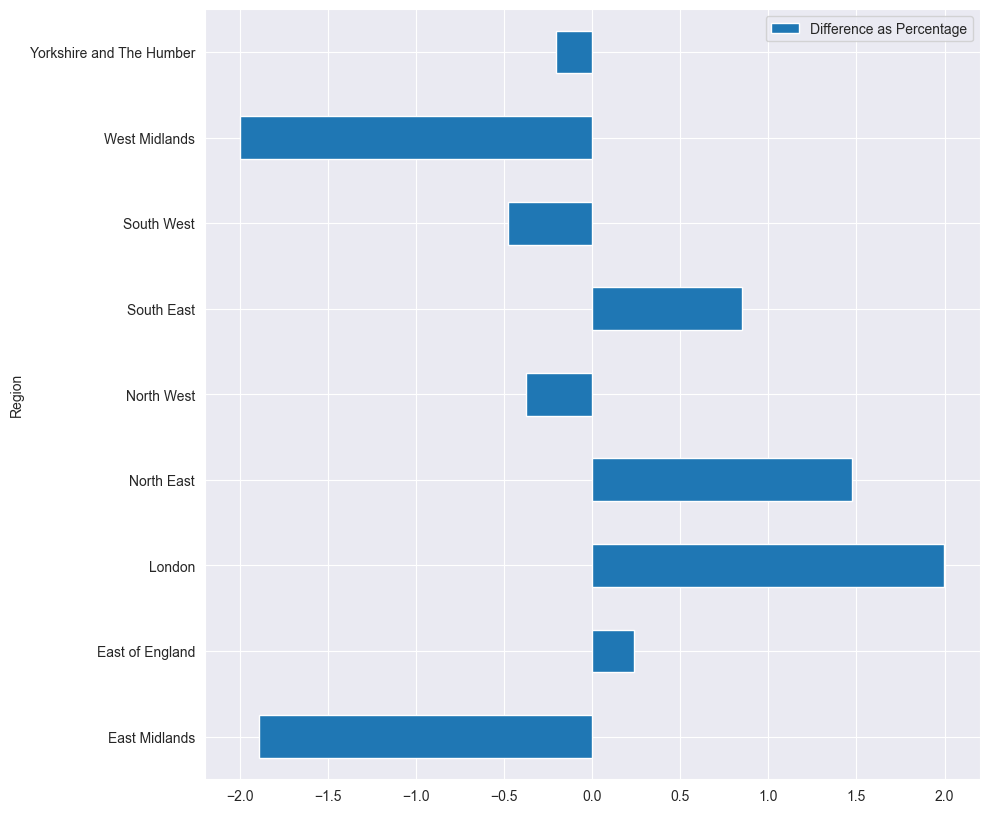

In [16]:
region_select = pd.pivot_table(data = flat_area_price_diff, index= 'Region', values= 'Difference as Percentage')
region_select.plot.barh(figsize = (10,10))

### 2.3.3. Comment on the Visualisation of Price Changes of Flats between July 2017 to July 2018

The bar chart shows the price changes of Flats as a percentage across the nine regions in England. It is very evident that the price of flats decreased within this one year gap for the following areas: East Midlands, North West, South West, West Midlands, and Yorkshire and the Hamper. Meanwhile, the price of flats in all the other regions increased over this one year. Although, the bar chart displayed shows large magnitudes of change between the different regions, it is important to look at this comprehensively as a collated difference in price changes across ALL the regions. Furthermore, the change is on a percentage scales of +2 to -2, which isn't large difference to understand conclusive patterns of flat prices. Perhaps, there are more useful ways of understanding whether the price changes of flats in relation to region, which will be explored in 2.4.

## Part 2.4: Statistical Analysis
### 2.4.1. Cross Tabulation of Price Changes from 2.3

This section looks at the price changes of Flats from 2.3 to investigate whether changes in Flat prices have affected all regions similarly. Firstly, each percentage change is assigned as either "Increase" or "Decrease; this information is cross tabulated across all regions.

In [17]:
def changefunc(row):
    if row["Difference as Percentage"] > 0:
        return "Increase"
    else:
        return "Decrease"

flat_area_price_change = flat_area_price_diff.assign(Change = flat_area_price_diff.apply(changefunc, axis = 1))
flat_area_price_change = flat_area_price_change.reset_index()
flat_area_price_change

,Area,Region,july2017,july2018,Difference,Difference as Percentage,Change
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050,1.162445,Increase
1,Barnet,London,403492.77130,393139.28910,-10353.48220,2.565965,Increase
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813,-3.770739,Decrease
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720,-2.237866,Decrease
4,Bedford,East of England,167562.35620,169497.10010,1934.74390,-1.154641,Decrease
...,...,...,...,...,...,...,...
146,Wirral,North West,102486.68380,103254.08380,767.40000,-0.748780,Decrease
147,Wokingham,South East,233806.26640,228119.70330,-5686.56310,2.432169,Increase
148,Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256,-3.873787,Decrease
149,Worcestershire,West Midlands,127758.55150,127751.56660,-6.98490,0.005467,Increase


In [18]:
change_crosstab = pd.crosstab(flat_area_price_change.Change, flat_area_price_change.Region)
change_crosstab

Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,9,6,10,3,11,6,9,12,8
Increase,0,5,23,9,12,13,6,2,7


### 2.4.2. Chi-Squared Test of Independence

A Chi-Squared test is used to deduce whether there is a relationship between Price Changes in Flat (between July 2017 - July 2018) and the nine regions of England. As per custom, the null hypothesis that there is no significant relationship between these two variables is assumed prior to carrying the test out.

In [19]:
test_stat, p_value, dof, expected = stats.chi2_contingency(change_crosstab, correction=False)

print('There are %d degrees of freedom for this Chi-Squared Test' % dof)
print('The Chi-Squared test statistic is %4.2f' % test_stat)
print(f'The p-value is {p_value.round(5)}')

There are 8 degrees of freedom for this Chi-Squared Test
The Chi-Squared test statistic is 27.60
The p-value is 0.00056


### 2.4.3. Interpreting the Chi-Squared Test

A chi-square test of independence was utilised to examine the relation between Flat prices and nine regions of England. The relation between these variables is significant, with a p-value of .00056 and the Chi-Squared value of 27.60. Therefore, the null hypothesis is rejected and the alternative hypothesis is accepted - there is a relationship between the two variables, meaning that Flat prices vary depending on the region of England between July 2017 to July 2018.
